In [39]:
import os
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from sklearn.model_selection import train_test_split

In [59]:
n=100000
delta_t=0.01


def lorenz(x, y, z, s=10, r=28, b=2.667):
    '''
    Given:
       x, y, z: a point of interest in three dimensional space
       s, r, b: parameters defining the lorenz attractor
    Returns:
       x_dot, y_dot, z_dot: values of the lorenz attractor's partial
           derivatives at the point x, y, z
    '''
    x_dot = s*(y-x)
    y_dot = r*x - y - x*z
    z_dot = x*y - b*z
    return x_dot, y_dot, z_dot

# Need one more for the initial values
xs = np.empty(n + 1)
ys = np.empty(n + 1)
zs = np.empty(n + 1)

# Set initial values
xs[0], ys[0], zs[0] = (0., 1., 1.05)

# Step through "time", calculating the partial derivatives at the current point
# and using them to estimate the next point
for i in range(n):
    x_dot, y_dot, z_dot = lorenz(xs[i], ys[i], zs[i])
    xs[i + 1] = xs[i] + (x_dot * delta_t)
    ys[i + 1] = ys[i] + (y_dot * delta_t)
    zs[i + 1] = zs[i] + (z_dot * delta_t)

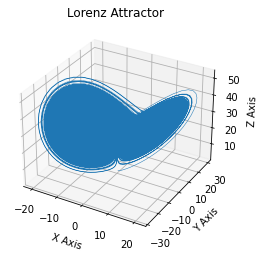

In [60]:
# Plot
fig = plt.figure()
ax = fig.gca(projection='3d')

ax.plot(xs, ys, zs, lw=0.5)
ax.set_xlabel("X Axis")
ax.set_ylabel("Y Axis")
ax.set_zlabel("Z Axis")
ax.set_title("Lorenz Attractor")

plt.show()

In [61]:
# Scaled to work with Neural networks.
xs_scaled = (xs-np.min(xs))/(np.max(xs)-np.min(xs))
ys_scaled = (ys-np.min(ys))/(np.max(ys)-np.min(ys))
zs_scaled = (zs-np.min(zs))/(np.max(zs)-np.min(zs))

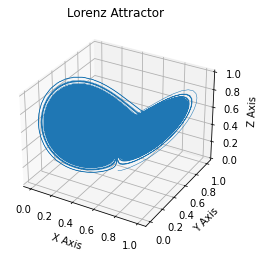

In [62]:
# Plot
fig = plt.figure()
ax = fig.gca(projection='3d')

ax.plot(xs_scaled, ys_scaled, zs_scaled, lw=0.5)
ax.set_xlabel("X Axis")
ax.set_ylabel("Y Axis")
ax.set_zlabel("Z Axis")
ax.set_title("Lorenz Attractor")

plt.show()

In [63]:
xs1_train = []
xs2_train = []
s=5
for i in range(s,n):
    xs1_train.append(xs_scaled[i-s:i])
    xs2_train.append(xs_scaled[i])
xs1_train, xs2_train = np.array(xs1_train), np.array(xs2_train)

In [64]:
ys1_train = []
ys2_train = []
s=5
for i in range(s,n):
    ys1_train.append(ys_scaled[i-s:i])
    ys2_train.append(ys_scaled[i])
ys1_train, ys2_train = np.array(ys1_train), np.array(ys2_train)

In [65]:
zs1_train = []
zs2_train = []
s=5
for i in range(s,n):
    zs1_train.append(zs_scaled[i-s:i])
    zs2_train.append(zs_scaled[i])
zs1_train, zs2_train = np.array(zs1_train), np.array(zs2_train)

In [66]:
def SimpleRNN_model(input_):
    print('encoder')
    print(input_.shape)
    x = SimpleRNN(128,input_shape=(s,3))(input_)
    print(x.shape)
    output = Dense(3)(x)
    print(output.shape)
    return output

In [67]:
input_ = tensorflow.keras.Input(shape=(s,3))
SimpleRNN_model = tensorflow.keras.Model(input_, SimpleRNN_model(input_))

encoder
(None, 5, 3)
(None, 128)
(None, 3)


In [68]:
opt = tensorflow.keras.optimizers.Adam()
SimpleRNN_model.compile(optimizer=opt, loss='mse')
SimpleRNN_model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 5, 3)]            0         
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, 128)               16896     
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 387       
Total params: 17,283
Trainable params: 17,283
Non-trainable params: 0
_________________________________________________________________


In [69]:
X_train=np.array([xs1_train,ys1_train,zs1_train]).reshape(len(xs1_train),s,3)
y_train=np.array([xs2_train,ys2_train,zs2_train]).reshape(len(xs1_train),3)

In [70]:
X_train.shape

(99995, 5, 3)

In [71]:
y_train.shape

(99995, 3)

In [72]:
epochs=5
SimpleRNN_model.fit(X_train,y_train,epochs=epochs,batch_size=128)

Epoch 1/5
782/782 [==============================] - 2s 2ms/step - loss: 0.0094
Epoch 2/5
782/782 [==============================] - 2s 2ms/step - loss: 4.6105e-05
Epoch 3/5
782/782 [==============================] - 2s 2ms/step - loss: 3.3120e-05
Epoch 4/5
782/782 [==============================] - 2s 2ms/step - loss: 2.1148e-05
Epoch 5/5
782/782 [==============================] - 2s 2ms/step - loss: 2.1828e-05


In [74]:
X_train[-1]

array([[0.3524533 , 0.34585104, 0.33969507],
       [0.33401351, 0.3288387 , 0.34585104],
       [0.33969507, 0.33401351, 0.3288387 ],
       [0.3242077 , 0.33969507, 0.33401351],
       [0.3288387 , 0.3242077 , 0.32016294]])

In [75]:
y_train_pred=SimpleRNN_model.predict(X_train)

In [76]:
y_train_pred.shape

(99995, 3)

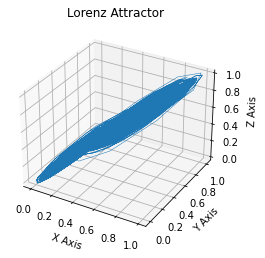

In [84]:
# Plot
fig = plt.figure()
ax = fig.gca(projection='3d')

ax.plot(y_train_pred[:,0], y_train_pred[:,1], y_train_pred[:,2], lw=0.5)
ax.set_xlabel("X Axis")
ax.set_ylabel("Y Axis")
ax.set_zlabel("Z Axis")
ax.set_title("Lorenz Attractor")

plt.show()

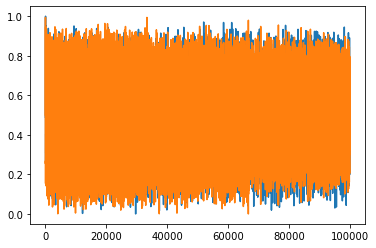

In [81]:
plt.plot(np.linspace(0,len(xs_scaled),len(xs_scaled)),xs_scaled)
plt.plot(np.linspace(s,len(xs_scaled),len(xs_scaled)-s-1),y_train_pred[:,0])

(0.0, 100.0)

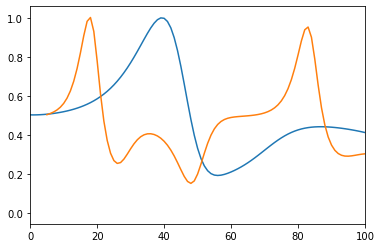

In [86]:
plt.plot(np.linspace(0,len(ys_scaled),len(ys_scaled)),ys_scaled)
plt.plot(np.linspace(s,len(ys_scaled),len(ys_scaled)-s-1),y_train_pred[:,1])
plt.xlim([0,100])
#plt.xlim([99900,100000])

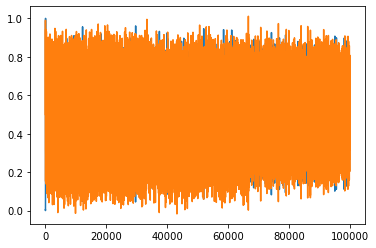

In [83]:
plt.plot(np.linspace(0,len(zs_scaled),len(zs_scaled)),zs_scaled)
plt.plot(np.linspace(s,len(zs_scaled),len(zs_scaled)-s-1),y_train_pred[:,2])

In [79]:
np.linspace(s,len(xs_scaled),len(xs_scaled)-s).shape

(99996,)

In [84]:
m=100000
tp=delta_t*m
x=np.linspace(ub,ub+tp,m)
testing_set=10+np.sin(100*x)*x**2+2*x

In [85]:
# Scaled to work with Neural networks.
testing_set_scaled = (testing_set-np.min(training_set))/(np.max(training_set)-np.min(training_set))

In [86]:
X_test = []
y_test = []
s=5
for i in range(s,m):
    X_test.append(testing_set_scaled[i-s:i])
    y_test.append(testing_set_scaled[i])
X_test, y_test = np.array(X_test), np.array(y_test)

In [87]:
y_test_pred=SimpleRNN_model.predict(X_test)

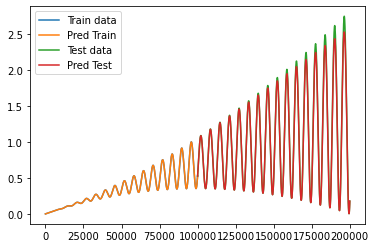

In [88]:
plt.plot(np.linspace(0,len(training_set_scaled),len(training_set_scaled)),training_set_scaled,label='Train data')
plt.plot(np.linspace(s,len(training_set_scaled),len(training_set_scaled)-s),y_train_pred,label='Pred Train')
plt.plot(np.linspace(n,n+len(testing_set_scaled),len(testing_set_scaled)),testing_set_scaled, label='Test data')
plt.plot(np.linspace(n+s,n+len(testing_set_scaled),len(testing_set_scaled)-s),y_test_pred,label='Pred Test')
plt.legend()

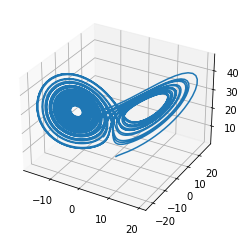

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from mpl_toolkits.mplot3d import Axes3D

rho = 28.0
sigma = 10.0
beta = 8.0 / 3.0

def f(state, t):
    x, y, z = state  # Unpack the state vector
    return sigma * (y - x), x * (rho - z) - y, x * y - beta * z  # Derivatives

state0 = [1.0, 1.0, 1.0]
t = np.arange(0.0, 40.0, 0.01)

states = odeint(f, state0, t)

fig = plt.figure()
ax = fig.gca(projection="3d")
ax.plot(states[:, 0], states[:, 1], states[:, 2])
plt.draw()
plt.show()